In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torchvision
from tqdm import tqdm_notebook as tqdm

# Path hack.
import sys, os
sys.path.insert(0, os.path.abspath('..'))

# Initial Performance Comparison

In [5]:
np.set_printoptions(precision=2)

parent_dir = '/home/manu/Projects/DNI-Bio/logs/SGD 32 hidden units'
for method in sorted(os.listdir(parent_dir)):
    method_dir = os.path.join(parent_dir, method)
    losses = []
    acc = []
    test_acc = []
    for f_name in os.listdir(method_dir):
        if os.path.isdir(os.path.join(method_dir, f_name)):
            # skip directories
            continue
        elif f_name.startswith('acc'):
            acc.append(np.load(os.path.join(method_dir, f_name))[-235:])
        elif f_name.startswith('test_accuracy'):
            test_acc.append(np.load(os.path.join(method_dir, f_name))[-1:])
        elif f_name.startswith('loss') and f_name.endswith('.npy'):
            losses.append(np.load(os.path.join(method_dir, f_name))[-234:])

    acc = np.array(acc)
    losses = np.array(losses)
    print(method + ' ' + str(np.mean(acc)) + ' ' + str(test_acc[0][0]))

dni 76.96476063829788 78.71
dni_frozen_synthesizer 57.004654255319146 58.85999999999999
dni_frozen_synthesizer_nonzero 9.951795212765957 9.799999999999999
dni_frozen_synthesizer_pretrained 50.671542553191486 50.41
vanila 94.05585106382979 94.54


In [6]:
np.set_printoptions(precision=2)

parent_dir = '/home/manu/Projects/DNI-Bio/logs/32 hidden units'
for method in sorted(os.listdir(parent_dir)):
    method_dir = os.path.join(parent_dir, method)
    losses = []
    acc = []
    test_acc = []
    for f_name in os.listdir(method_dir):
        if os.path.isdir(os.path.join(method_dir, f_name)):
            # skip directories
            continue
        elif f_name.startswith('acc'):
            acc.append(np.load(os.path.join(method_dir, f_name))[-235:])
        elif f_name.startswith('test_accuracy'):
            test_acc.append(np.load(os.path.join(method_dir, f_name))[-1:])
        elif f_name.startswith('loss') and f_name.endswith('.npy'):
            losses.append(np.load(os.path.join(method_dir, f_name))[-234:])

    acc = np.array(acc)
    losses = np.array(losses)
    print(method + ' ' + str(np.mean(acc)) + ' ' + str(test_acc[0][0]))

dni 92.6989140070922 93.53999999999999
dni_frozen_synthesizer 59.650930851063826 59.19999999999999
dni_frozen_synthesizer_nonzero 33.78767730496454 31.259999999999998
dni_frozen_synthesizer_pretrained 21.846742021276597 24.3
vanila 99.3251329787234 97.19999999999999


In [7]:
np.set_printoptions(precision=2)

parent_dir = '/home/manu/Projects/DNI-Bio/logs/32 hidden units rerun'
for method in sorted(os.listdir(parent_dir)):
    method_dir = os.path.join(parent_dir, method)
    losses = []
    acc = []
    test_acc = []
    for f_name in os.listdir(method_dir):
        if os.path.isdir(os.path.join(method_dir, f_name)):
            # skip directories
            continue
        elif f_name.startswith('acc'):
            acc.append(np.load(os.path.join(method_dir, f_name))[-235:])
        elif f_name.startswith('test_accuracy'):
            test_acc.append(np.load(os.path.join(method_dir, f_name))[-1:])
        elif f_name.startswith('loss') and f_name.endswith('.npy'):
            losses.append(np.load(os.path.join(method_dir, f_name))[-234:])

    acc = np.array(acc)
    losses = np.array(losses)
    print(method + ' ' + str(np.mean(acc)) + ' ' + str(test_acc[0][0]))

dni 36.99855939716312 40.510000000000005
dni_frozen_synthesizer 56.011746453900706 56.40000000000002
dni_frozen_synthesizer_nonzero 9.89804964539007 9.799999999999999
dni_frozen_synthesizer_nonzero_pretrained 10.943040780141844 9.739999999999998
dni_frozen_synthesizer_pretrained 48.15769060283688 46.52
vanila 94.1832890070922 94.80999999999999


In [4]:
np.set_printoptions(precision=2)

parent_dir = '/home/manu/Projects/DNI-Bio/logs/256 hidden units'
for method in sorted(os.listdir(parent_dir)):
    method_dir = os.path.join(parent_dir, method)
    losses = []
    acc = []
    test_acc = []
    for f_name in os.listdir(method_dir):
        if os.path.isdir(os.path.join(method_dir, f_name)):
            # skip directories
            continue
        elif f_name.startswith('acc'):
            acc.append(np.load(os.path.join(method_dir, f_name))[-235:])
        elif f_name.startswith('test_accuracy'):
            test_acc.append(np.load(os.path.join(method_dir, f_name))[-1:])
        elif f_name.startswith('loss') and f_name.endswith('.npy'):
            losses.append(np.load(os.path.join(method_dir, f_name))[-234:])

    acc = np.array(acc)
    losses = np.array(losses)
    print(method + ' ' + str(np.mean(acc)) + ' ' + str(test_acc[0][0]))

dni 96.53479609929079 95.87999999999998
dni_frozen_synthesizer 90.35959663120568 90.64
dni_frozen_synthesizer_nonzero 52.45456560283688 42.87
dni_frozen_synthesizer_pretrained 30.410017730496453 19.559999999999995
vanila 99.9290780141844 98.64999999999998


# Training Curves

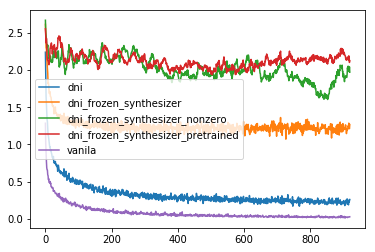

In [6]:
parent_dir = '/home/manu/Projects/DNI-Bio/logs/32 hidden units'
for method in sorted(os.listdir(parent_dir)):
    method_dir = os.path.join(parent_dir, method)
    losses = []
    for f_name in os.listdir(method_dir):
        if f_name.startswith('loss') and f_name.endswith('.npy'):
            losses.append(np.load(os.path.join(method_dir, f_name)))
    plt.plot(np.mean(losses, axis=0), label=method)

plt.legend()

/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


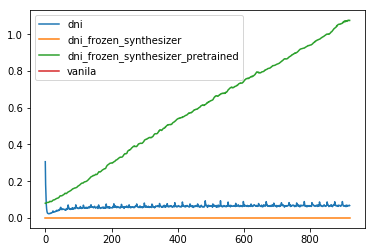

In [7]:
parent_dir = '/home/manu/Projects/DNI-Bio/logs/32 hidden units'
for method in sorted(os.listdir(parent_dir)):
    method_dir = os.path.join(parent_dir, method)
    grad_norms = []
    if method.endswith('nonzero'):
        continue
    for f_name in os.listdir(method_dir):
        if f_name.startswith('synth') and f_name.endswith('.npy'):
            grad_norms.append(np.load(os.path.join(method_dir, f_name)))
    plt.plot(np.mean(grad_norms, axis=0), label=method)

plt.legend()

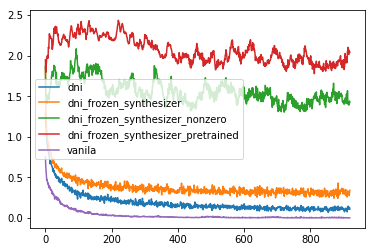

In [9]:
parent_dir = '/home/manu/Projects/DNI-Bio/logs/256 hidden units'
for method in sorted(os.listdir(parent_dir)):
    method_dir = os.path.join(parent_dir, method)
    losses = []
    for f_name in os.listdir(method_dir):
        if f_name.startswith('loss') and f_name.endswith('.npy'):
            losses.append(np.load(os.path.join(method_dir, f_name)))
    plt.plot(np.mean(losses, axis=0), label=method)

plt.legend()

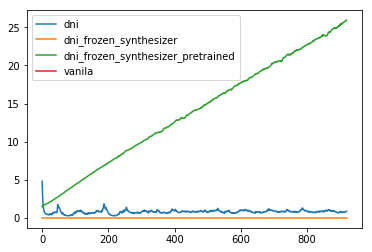

In [10]:
parent_dir = '/home/manu/Projects/DNI-Bio/logs/256 hidden units'
for method in sorted(os.listdir(parent_dir)):
    method_dir = os.path.join(parent_dir, method)
    grad_norms = []
    if method.endswith('nonzero'):
        continue
    for f_name in os.listdir(method_dir):
        if f_name.startswith('synth') and f_name.endswith('.npy'):
            grad_norms.append(np.load(os.path.join(method_dir, f_name)))
    plt.plot(np.mean(grad_norms, axis=0), label=method)

plt.legend()